# Limpieza de datos con contexto

In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [74]:

# Simulando un dataset
data = {
    "runner_id": [1, 2, 3, 4, 5, 6],
    "name": ["Alice", "Bob", "Charlie", "David", "Eve", "Frank"],
    "age": [25, 32, None, 28, 45, None],
    "gender": ["F", "M", None, "M", "F", "M"],
    "city": ["NY", "LA", None, "NY", "SF", "LA"],
    "time_minutes": [240, 0, 320, 210, 180, 0],
    "completed": ["Yes", "No", "Yes", "Yes", "Yes", "No"]
}

# Crear el DataFrame
df = pd.DataFrame(data)


## Tarea

`Contexto`: Eres un analista de datos trabajando para una empresa que organiza maratones en diferentes ciudades. 
Te han proporcionado un archivo con los datos de los corredores que participaron en un reciente evento. 
El objetivo es preparar estos datos para un análisis de rendimiento, enfocándote en métricas como el tiempo promedio, el porcentaje de finalización y patrones entre los participantes.


1. Análisis inicial del dataset: Observa los datos, busca valores nulos o inconsistencias, y decide qué columnas requieren limpieza.
2. Toma de decisiones de limpieza:
    - Decide cómo manejar las filas con valores nulos en age, gender y city. Explica tu razonamiento.
    - Algunos valores de time_minutes son 0. Decide si eliminar estas filas o mantenerlas y justifica tu decisión.
    - Revisa la columna completed. Si un corredor no completó la carrera (No), ¿debería su tiempo (time_minutes) incluirse en el cálculo del tiempo promedio?
3. Limpieza de datos: Realiza las transformaciones necesarias en el DataFrame.
4. Visualización y análisis: Usa seaborn para crear un gráfico que muestre el tiempo promedio por género y ciudad.

In [75]:
df

,runner_id,name,age,gender,city,time_minutes,completed
0,1,Alice,25.0,F,NY,240,Yes
1,2,Bob,32.0,M,LA,0,No
2,3,Charlie,NaN,None,None,320,Yes
3,4,David,28.0,M,NY,210,Yes
4,5,Eve,45.0,F,SF,180,Yes
5,6,Frank,NaN,M,LA,0,No


## Limpieza de datos con contexto

In [76]:
df_clean = df.copy()

df_clean.dtypes

runner_id         int64
name             object
age             float64
gender           object
city             object
time_minutes      int64
completed        object
dtype: object

In [77]:
df_clean['completed'] = df_clean['completed'].astype('category')        # Convertir a categoria pq solo hay dos valores
df_clean['age'] = df_clean['age'].astype('Int64')                       # Convertir a Int64 pq solo hay valores enteros y para poder manejar NaN.

df_clean['gender'] = df_clean['gender'].fillna("Sin especificar")       # Reemplazar valores None o NaN en 'gender' y 'city' con "Sin especificar"
df_clean['city'] = df_clean['city'].fillna("Sin especificar") 

df_clean['gender'] = df_clean['gender'].astype('string')                # Convertir a string.
df_clean['city'] = df_clean['city'].astype('string')                    # Convertir a string.
df_clean['name'] = df_clean['name'].astype('string')                    # Convertir a string.

df_clean['time_minutes'] = df_clean['time_minutes'].astype('float64')   # Convertir a float64 para poder manejar tiempos con decimales.
df_clean['time_minutes'] = df_clean['time_minutes'].replace(0, np.nan)


df_clean.dtypes

runner_id          int64
name              string
age                Int64
gender            string
city              string
time_minutes     float64
completed       category
dtype: object

In [78]:
df_clean

,runner_id,name,age,gender,city,time_minutes,completed
0,1,Alice,25,F,NY,240.0,Yes
1,2,Bob,32,M,LA,NaN,No
2,3,Charlie,<NA>,Sin especificar,Sin especificar,320.0,Yes
3,4,David,28,M,NY,210.0,Yes
4,5,Eve,45,F,SF,180.0,Yes
5,6,Frank,<NA>,M,LA,NaN,No


---

## Análisis.

In [85]:
df_clean.describe()

,runner_id,age,time_minutes
count,6.000000,4.0,4.000000
mean,3.500000,32.5,237.500000
std,1.870829,8.812869,60.207973
min,1.000000,25.0,180.000000
25%,2.250000,27.25,202.500000
50%,3.500000,30.0,225.000000
75%,4.750000,35.25,260.000000
max,6.000000,45.0,320.000000


## Visualización de datos

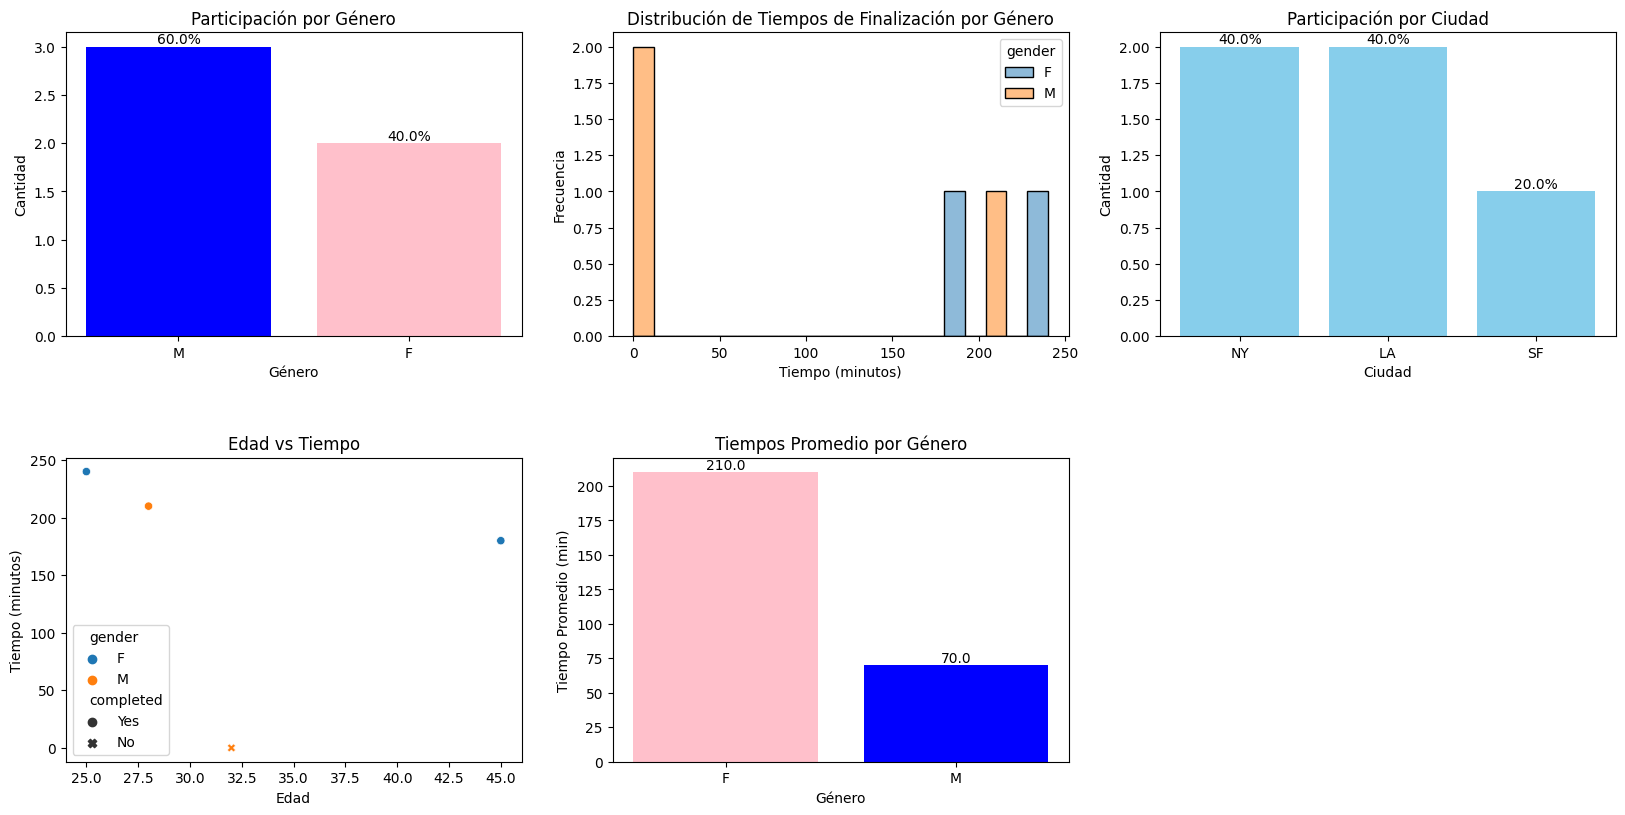

In [103]:
# Configurar el tamaño del lienzo
plt.figure(figsize=(20, 15))

# Gráfico 1: Porcentaje de participación por género
plt.subplot(3, 3, 1)
gender_counts = df['gender'].value_counts()
gender_percentage = (gender_counts / gender_counts.sum()) * 100
bars = plt.bar(gender_counts.index, gender_counts.values, color=['blue', 'pink', 'gray'])
plt.title('Participación por Género')
plt.xlabel('Género')
plt.ylabel('Cantidad')

# Agregar etiquetas de porcentaje sobre las barras
for bar, perc in zip(bars, gender_percentage):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{perc:.1f}%', ha='center', va='bottom')

# Gráfico 2: Distribución de tiempos de finalización por género
plt.subplot(3, 3, 2)
sns.histplot(data=df, x='time_minutes', hue='gender', bins=20)
plt.title('Distribución de Tiempos de Finalización por Género')
plt.xlabel('Tiempo (minutos)')
plt.ylabel('Frecuencia')

# Gráfico 3: Porcentaje de participantes por ciudad
plt.subplot(3, 3, 3)
city_counts = df['city'].value_counts()
city_percentage = (city_counts / city_counts.sum()) * 100
bars = plt.bar(city_counts.index, city_counts.values, color='skyblue')
plt.title('Participación por Ciudad')
plt.xlabel('Ciudad')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)

# Agregar etiquetas de porcentaje sobre las barras
for bar, perc in zip(bars, city_percentage):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{perc:.1f}%', ha='center', va='bottom')

# Gráfico 4: Edad vs Tiempo (original)
plt.subplot(3, 3, 4)
sns.scatterplot(data=df, x='age', y='time_minutes', hue='gender', style='completed')
plt.title('Edad vs Tiempo')
plt.xlabel('Edad')
plt.ylabel('Tiempo (minutos)')

# Gráfico 5: Tiempos promedio por género (original)
plt.subplot(3, 3, 5)
gender_means = df.groupby('gender')['time_minutes'].mean()
bars = plt.bar(gender_means.index, gender_means.values, color=['pink', 'blue', 'gray'])
plt.title('Tiempos Promedio por Género')
plt.xlabel('Género')
plt.ylabel('Tiempo Promedio (min)')

# Agregar etiquetas de valores sobre las barras
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.1f}', ha='center', va='bottom')

# Ajustar el diseño
plt.subplots_adjust(wspace=0.2, hspace=0.4)
plt.show()


In [92]:
df_clean

,runner_id,name,age,gender,city,time_minutes,completed
0,1,Alice,25,F,NY,240.0,Yes
1,2,Bob,32,M,LA,NaN,No
2,3,Charlie,<NA>,Sin especificar,Sin especificar,320.0,Yes
3,4,David,28,M,NY,210.0,Yes
4,5,Eve,45,F,SF,180.0,Yes
5,6,Frank,<NA>,M,LA,NaN,No
